In [1]:
import mjetc as etc

ModuleNotFoundError: No module named 'mjetc'

In [1]:
import sys
sys.path.append('../mj_etc/')
from etc_class import *
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

In [2]:
etc = ETC('moaR','MOA','1.8m',moon_phase='dark')

<class 'numpy.int64'>


ValueError: read_noise must be a float or integer

<Quantity 736.1 s>

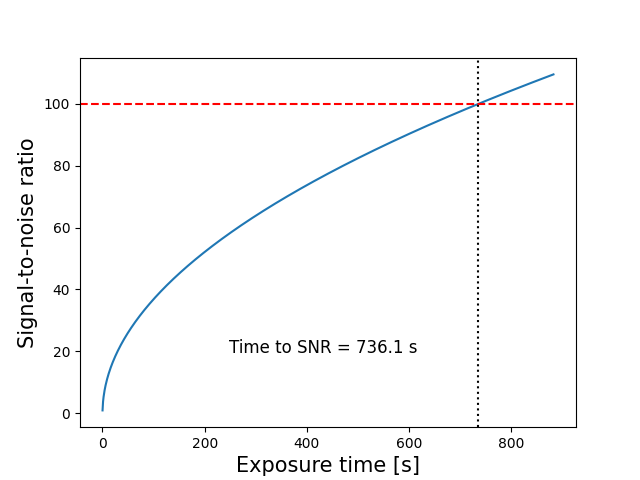

In [4]:
etc.time_for_snr(100,mag=20,plot=True)

(0.0, 400.0)

In [10]:
etc.print_status()

Detector: MOA
Filter: moaR
Detector qe: nan
Telescope: 1.8m
Diameter: 1.8 m
Telescope throughput: 1
Source: 25
Aperture: 28.274333882308138
Sky: 20.8
Sky photons: 6078.063596905919 1 / s
Source photons: 4.491308198085047 1 / s




In [19]:
test = np.sqrt(2785.2219435420784 * etc.exp_time)

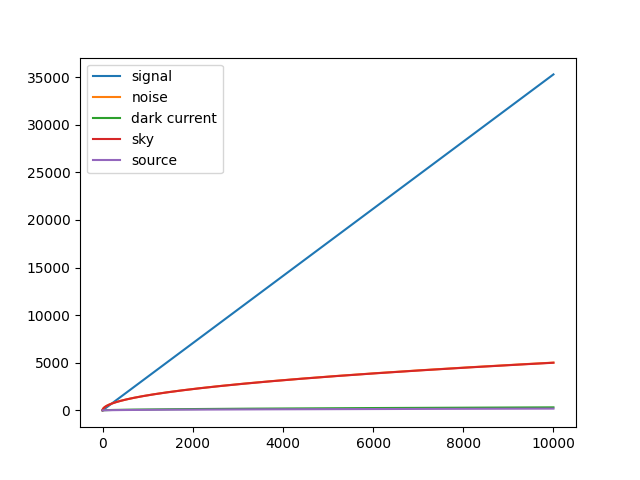

In [6]:
plt.figure()

plt.plot(etc.exp_time,etc.signal,label='signal')
plt.plot(etc.exp_time,etc.noise,label='noise')
plt.plot(etc.exp_time,etc._dc_noise,label='dark current')
plt.plot(etc.exp_time,etc._sky_noise,label='sky')
plt.plot(etc.exp_time,etc._source_noise,label='source')
plt.legend()

In [10]:
etc

In [116]:
n = np.sqrt(etc.sky.photons.value + etc.source.photons.value)

In [118]:
etc.source.photons / n * np.sqrt(etc.exp_time.value)

<Quantity [  0.54511823,   1.80795264,   2.49804557, ..., 172.35652388,
           172.36514399, 172.37376367] 1 / s>

In [119]:
2000/60

33.333333333333336

In [101]:
dc = np.sqrt(etc.detector.dark_current * etc.exp_time * etc.aper_pix
          * etc.detector.gain)
sky = np.sqrt(etc.sky.photons * etc.telescope.throughput 
              * etc.exp_time * etc.detector.qe * etc.detector.gain)
source = np.sqrt(etc.source.photons * etc.telescope.throughput 
                 * etc.exp_time * etc.detector.qe * etc.detector.gain)
read = etc.detector.read_noise * np.sqrt(etc.aper_pix)
noise = np.sqrt(dc**2+sky**2+source**2+read**2)

In [102]:
noise

<Quantity [  17.96031714,   38.6931293 ,   51.68891098, ..., 3426.7552362 ,
           3426.92661639, 3427.097988  ]>

In [103]:
s

<Quantity [1.40510874e+01, 1.54561961e+02, 2.95072836e+02, ...,
           1.40470126e+06, 1.40484177e+06, 1.40498228e+06]>

In [104]:
noise = np.sqrt(dc**2+sky**2+source**2+read**2)

In [105]:
s = etc.source.photons * etc.telescope.throughput * etc.exp_time * etc.detector.qe * etc.detector.gain

In [106]:
source/noise

<Quantity [0.13168641, 0.20272974, 0.20968494, ..., 0.21822721, 0.21822721,
           0.21822721]>

In [107]:
read

14.321817814506549

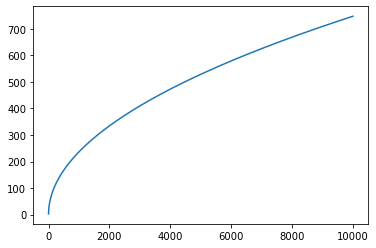

In [108]:
plt.figure()
plt.plot(etc.exp_time,s/np.sqrt(s))


In [97]:
etc.telescope.area

<Quantity 0.28274334 m2>

In [7]:
s = etc.sky.sky_brightness

In [60]:
Wavelength = etc.detector.bandpass.wavelength.to(u.m)
Area = etc.telescope.area
Bandwidth = etc.detector.bandpass.bandwidth.to(u.m)


Flux=10**(-(s+48.6)/2.5)
Flux=Flux*10**-7*10**4 # convert to SI [J/s/Hz/m^2/arcsec^2]
Flux=Flux*3*10**8/((Wavelength)**2) # Converting to wavelength [J/s/m/m^2/arcsec^2]
Flux=Flux*Bandwidth # multiply by bandwidth [J/s/m^2/arcsec^2]
Flux=Flux*Area # [J/s/arcsec^2]
#Flux=Flux*QE*Tau*Gain #Scalling by instrument [J/s/arcsec^2]
Flux=Flux*etc.aper #[J/s/pix]
sky=(Flux/((6.626*10**-34*3*10**8)/Wavelength))

In [61]:
sky

<Quantity 3438.58201347 m2>

In [62]:
etc.sky.photons

<Quantity 3438.54560931 1 / s>

In [20]:
s

18.5

In [45]:
f = 10**(-2/5*(s+48.6)) * u.erg / u.s / u.cm**2 / u.Hz

In [34]:
f

<Quantity 2.51188643e-27 erg / (cm2 Hz s)>

In [35]:
f = f * etc.aper 

In [46]:
f = f.to(u.W/u.Hz/u.m**2)

In [43]:
f

<Quantity 1.44543977e-30 W / (Hz m2)>

In [49]:
ff = f * (const.c.to(u.m*u.Hz) / (etc.detector.bandpass.wavelength.to(u.m)**2)) 

In [55]:
ff.to(u.W/u.m**2/u.micron) * etc.detector.bandpass.bandwidth.to(u.micron)

<Quantity 1.25603048e-16 W / m2>

In [54]:
ff.to(u.W/u.m**2/u.micron) * etc.detector.bandpass.wavelength.to(u.micron)

<Quantity 7.86446355e-16 W / m2>

In [13]:
etc.aperture_size()

12.566370614359172

In [5]:
etc.sky.photons

<Quantity 3438.54560931 1 / s>

In [6]:
etc.source.photons

<Quantity 433.67553731 1 / s>

In [16]:
2 / 0.338

5.9171597633136095

In [8]:
ps = etc.telescope.platescale * etc.detector.pix_size.to(u.mm).value

In [6]:
def mag2flux(mag):
	flux = 10**(-(mag+48.6)/2.5)
	flux = flux * u.erg / u.s / u.cm**2 / u.Hz
	return flux

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const

In [ ]:
etc.ban

In [14]:
sky = 21.8  # this needs to be 
# convert to mag
flux = mag2flux(sky)
#convert to SI units 
flux = flux.to(u.J/u.s/u.Hz/u.m**2)
# convert to Lambda [J/s/m/m^2/pix]
flux_lam = flux * const.c / (etc.detector.bandpass.wavelength.to(u.m)**2)
#flux_lam = flux_lam.to(u.J/ u.s/ u.m /u.m**2)
# multiply by bandwidth [J/s/m^2/pix]
flux_lam = flux_lam * etc.detector.bandpass.bandwidth.to(u.m)
# multiply by size of telescope [J/s/pix]
flux_lam = flux_lam * etc.telescope.area
# divide by average energy of a photon 
sky_photons = flux_lam / ((const.h * const.c)/etc.detector.bandpass.wavelength.to(u.m))
sky_photons = sky_photons.to(1/u.s)* 12.57

In [16]:
source = mag2flux(22)
#convert to SI units 
flux = source.to(u.J/u.s/u.Hz/u.m**2)
# convert to Lambda [J/s/m/m^2]
flux_lam = flux * const.c / (etc.detector.bandpass.wavelength.to(u.m)**2)
# multiply by bandwidth [J/s/m^2]
flux_lam = flux_lam * etc.detector.bandpass.bandwidth.to(u.m)
# multiply by size of pixel [J/s]
flux_lam = flux_lam * etc.telescope.area
photons = flux_lam / ((const.h * const.c)/etc.detector.bandpass.wavelength.to(u.m))
photons = photons.to(1/u.s)

In [21]:
etc.detector.bandpass.wavelength

<Quantity 551. nm>

In [19]:
etc.telescope.area

<Quantity 0.78539816 m2>

In [20]:
.5**2 * np.pi

0.7853981633974483

In [18]:
photons * 300

<Quantity 3268.03109351 1 / s>

In [15]:
sky_photons

<Quantity 164.62667355 1 / s>

In [4]:
etc.aper 

12.566370614359172

In [5]:
etc.aper_pix

96.08878348801241

In [10]:
etc.sky.photons

<Quantity 5.15783814e+08 1 / s>

In [16]:
etc.source.photons

<Quantity 24.74385865 1 / s>

In [19]:
etc.source.photons

<Quantity 68.73294068 1 / s>

In [20]:
68/24

2.8333333333333335

In [21]:
124521*3

373563

In [5]:
test = np.loadtxt('/Users/rri38/Documents/work/code/source_synphot/source_synphot/passbands/MOA/moa_R.txt')

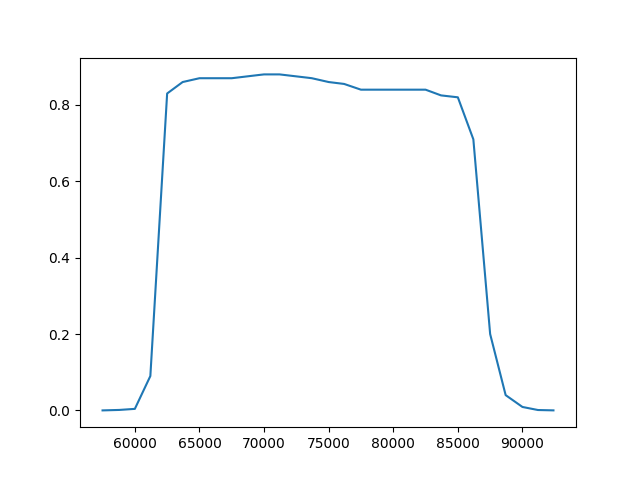

In [6]:
plt.figure()
plt.plot(test[:,0],test[:,1])

In [7]:
ind = test[:,1] > 0.7

In [8]:
wave = test[ind,0]

In [10]:
(wave[0] + wave[-1]) / 2

74250.0